In [1]:
from pathlib import Path

import pandas as pd

In [2]:
file_path = 'P:/MinhChau_research_shared/2024-2025_PostdocLLF/Corpus/Data_input/tsvFiles/crdo-MTQ_KTM_data20.tsv'
df = []
# Read the TSV file into a DataFrame
df = pd.read_csv(file_path, sep='\t') 
# Display the first few lines of the DataFrame
print(df.head())

  spe_id  uid  syl_begin  syl_end  cyc_begin   cyc_end          f0       oq_1  \
0     F7  101     13.623   14.124   0.055151  0.059073  254.942716  50.289017   
1     F7  101     13.623   14.124   0.059073  0.063230  240.591722  75.409836   
2     F7  101     13.623   14.124   0.063230  0.067413  239.026069  75.675676   
3     F7  101     13.623   14.124   0.067413  0.071655  235.735358  75.935829   
4     F7  101     13.623   14.124   0.071655  0.075870  237.280712  72.580645   

        oq_2       oq_3       oq_4    oq_gold  creak  
0  50.289017  60.047703  64.092905   0.000000      0  
1  73.770492  65.988645  69.750847  73.770492      0  
2  75.675676  68.117290  75.534476  75.675676      0  
3  77.005348  70.569769  70.569769   0.000000      0  
4  73.655914  62.104951  70.947247   0.000000      0  


In [4]:
print(f"number of cycles: {df.shape[0]:,}")
print(f"number of cycles not analyzed: {df.query('oq_gold == 0').shape[0]:,} ({df.query('oq_gold == 0').shape[0] / df.shape[0]:.1%})")

number of cycles: 415,145
number of cycles not analyzed: 98,259 (23.7%)


In [5]:
correct_methods = df[["oq_1", "oq_2", "oq_3", "oq_4"]] == df["oq_gold"].to_numpy()[:, None]

with pd.option_context("display.float_format", "{:.1%}".format):
    print(correct_methods.sum(axis=0) / correct_methods.shape[0])

oq_1   20.5%
oq_2   46.6%
oq_3   13.0%
oq_4   31.1%
dtype: float64


In [6]:
with pd.option_context("display.float_format", "{:.1%}".format):
    print(correct_methods[~correct_methods["oq_2"]].mean(axis=0))

oq_1    0.4%
oq_2    0.0%
oq_3   21.6%
oq_4   55.6%
dtype: float64


In [7]:
# First check: on easy cases: (i. objective reason) 4 methods are identical, which means that a unique peak has been found.

# Check how many values where the columns 'oq_1', 'oq_2', 'oq_3', and 'oq_4' are identical means that a unique peak was detected
identical_4oqs = df[(df['oq_1'] == df['oq_2']) & (df['oq_1'] == df['oq_3']) & (df['oq_1'] == df['oq_4'])]
# Calculate the percentage
percentage_identical_4oqs = (len(identical_4oqs) / len(df)) * 100
print(f"number of identical oq values for all 4 methods: {len(identical_4oqs):.2f} cycles")
print(f"Percentage of indentical oq values for all 4 methods: {percentage_identical_4oqs:.2f}%")
identical_4oqs

number of identical oq values for all 4 methods: 783.00 cycles
Percentage of indentical oq values for all 4 methods: 0.19%


,spe_id,uid,syl_begin,syl_end,cyc_begin,cyc_end,f0,oq_1,oq_2,oq_3,oq_4,oq_gold,creak
2280,F7,532,603.711,604.051,0.136265,0.142672,156.085901,0.0,0.0,0.0,0.0,0.0,2
2281,F7,532,603.711,604.051,0.142672,0.151246,116.622269,0.0,0.0,0.0,0.0,0.0,2
2283,F7,532,603.711,604.051,0.164239,0.178542,69.917874,0.0,0.0,0.0,0.0,0.0,2
2284,F7,532,603.711,604.051,0.178542,0.192844,69.917874,0.0,0.0,0.0,0.0,0.0,2
4435,F7,1001,53.876,54.267,0.223586,0.229676,164.181224,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392101,F12,5702,913.837,914.292,0.382865,0.385572,369.447197,0.0,0.0,0.0,0.0,0.0,0
393265,F12,6031,463.449,463.764,0.179545,0.193236,73.044799,0.0,0.0,0.0,0.0,0.0,2
398649,F17,1502,1291.302,1291.840,0.219502,0.226080,152.008396,0.0,0.0,0.0,0.0,0.0,1
406854,F17,4042,1481.234,1481.593,0.171601,0.175852,235.219907,0.0,0.0,0.0,0.0,0.0,0


In [8]:
# Find out if, in the case where the 4 methods are identical, there are cases where the oqs are not zeros.
cases_with_non_zero_oq = identical_4oqs[identical_4oqs['oq_1'] != 0]
print(f"Number of cases where the 4 methods are identical and different from 0: {len(cases_with_non_zero_oq)}")

Number of cases where the 4 methods are identical and different from 0: 0


In [9]:
# If the oq values are rounded without decimal, this means that the difference is trivial (“quasi identical”).
df['oq_1_rounded'] = df['oq_1'].round(0)
df['oq_2_rounded'] = df['oq_2'].round(0)
df['oq_3_rounded'] = df['oq_3'].round(0)
df['oq_4_rounded'] = df['oq_4'].round(0)

# Check if the rounded columns 'oq_1', 'oq_2', 'oq_3', and 'oq_4' are equal
identical_methods_rounded = df[(df['oq_1_rounded'] == df['oq_2_rounded']) & 
                               (df['oq_1_rounded'] == df['oq_3_rounded']) & 
                               (df['oq_1_rounded'] == df['oq_4_rounded'])]
            
# Filter out cases where all methods are indentical and zero
identical_4oqs_nonzeros = identical_methods_rounded[identical_methods_rounded['oq_1'] != 0]

#percentage of cases where the rounded values of the 4 methods are quasi-identical and different from zero
percentage_identical_4oqs_rounded = (len(identical_4oqs_nonzeros ) / len(df)) * 100

num_cases = len(identical_4oqs_nonzeros)
print(f"Number of cases where the rounded values (no decimal) of the 4 methods are identical and 'oq_gold' is different from 0: {num_cases}")
print(f"percentage: {percentage_identical_4oqs_rounded:.2f}%")
print(identical_4oqs_nonzeros)

Number of cases where the rounded values (no decimal) of the 4 methods are identical and 'oq_gold' is different from 0: 49008
percentage: 11.81%
       spe_id   uid  syl_begin   syl_end  cyc_begin   cyc_end          f0  \
43         F7   101     13.623    14.124   0.237385  0.241555  239.822889   
62         F7   101     13.623    14.124   0.316105  0.320172  245.905364   
64         F7   101     13.623    14.124   0.324225  0.328257  247.961035   
104        F7   102    572.489   572.939   0.048526  0.052808  233.547921   
111        F7   102    572.489   572.939   0.078687  0.083034  230.030874   
...       ...   ...        ...       ...        ...       ...         ...   
415003    F17  6622   1675.340  1675.409   0.049700  0.056240  152.900124   
415004    F17  6622   1675.340  1675.409   0.056240  0.060915  213.902989   
415101    F17  6642   1675.869  1676.233   0.076559  0.082120  179.818274   
415140    F17  6642   1675.869  1676.233   0.266568  0.270473  256.077593   
415142  

In [30]:
# In case 4 methods are identical, check which method has been chosen for the oq_gold
# Check which method has been chosen for the oq_gold
correct_methods = identical_4oqs_nonzeros[["oq_1", "oq_2", "oq_3", "oq_4"]] == identical_4oqs_nonzeros["oq_gold"].to_numpy()[:, None]

with pd.option_context("display.float_format", "{:.1%}".format):
    print(correct_methods.sum(axis=0) / correct_methods.shape[0])

# Check the percentage of cases where oq_gold is 0
oq_gold_zero_percentage = (identical_4oqs_nonzeros["oq_gold"] == 0).mean() * 100

print(f"Percentage of cases where oq_gold is 0: {oq_gold_zero_percentage:.1f}%")


oq_1   43.0%
oq_2   68.7%
oq_3   31.1%
oq_4   34.4%
dtype: float64
Percentage of cases where oq_gold is 0: 2.6%


In [23]:
# Second check on the easy case: (ii. subjective reason) the oq_gold values of a syllable are all retained or excluded, 
# meaning that the case was evident (in human eye) with one or without one well-precise peak throughout the syllable.    
# The case that all are excluded is a sensitive case to consider as a easy case or difficult case. 
# Group by 'uid' and check if all 'oq_gold' values are either all zero or all non-zero

# Function: group (by 'uid') and check if all 'oq_gold' values are either all zero or all non-zero
def check_oq_gold(group):
    all_zero = (group['oq_gold'] == 0).all()
    all_non_zero = (group['oq_gold'] != 0).all()
    return pd.Series({'all_zero': all_zero, 'all_non_zero': all_non_zero})

# Apply the check function to each 'uid' group
result = df.groupby('uid').apply(check_oq_gold)

# Extract UIDs where all oq_gold are zero or non-zero
all_zero_uids = result[result['all_zero']].index
all_non_zero_uids = result[result['all_non_zero']].index

# Display the results
print(f"Number of cases where all 'oq_gold' values are zero: {len(all_zero_uids)}")
print(f"Number of cases where all 'oq_gold' values are non-zero: {len(all_non_zero_uids)}")


print("Cases where all 'oq_gold' values are zero:")
print(df[df['uid'].isin(all_zero_uids)])

print("Cases where all 'oq_gold' values are non-zero:")
print(df[df['uid'].isin(all_non_zero_uids)])

Number of cases where all 'oq_gold' values are zero: 0
Number of cases where all 'oq_gold' values are non-zero: 0
Cases where all 'oq_gold' values are zero:
Empty DataFrame
Columns: [spe_id, uid, syl_begin, syl_end, cyc_begin, cyc_end, f0, oq_1, oq_2, oq_3, oq_4, oq_gold, creak, oq_1_rounded, oq_2_rounded, oq_3_rounded, oq_4_rounded]
Index: []
Cases where all 'oq_gold' values are non-zero:
Empty DataFrame
Columns: [spe_id, uid, syl_begin, syl_end, cyc_begin, cyc_end, f0, oq_1, oq_2, oq_3, oq_4, oq_gold, creak, oq_1_rounded, oq_2_rounded, oq_3_rounded, oq_4_rounded]
Index: []


C:\Users\minhc\AppData\Local\Temp\ipykernel_12804\3155421482.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('uid').apply(check_oq_gold)


In [3]:
#Plot: the distribution of delta methods 1-2, 3-4, 1-3, and 2-4 and the percentage of oq_gold values that are zero
import matplotlib.pyplot as plt

In [31]:
# Calculate the deltas
df['delta_1_2'] = abs(df['oq_1'] - df['oq_2']) #absolute value of the difference between oq_1 (maxima on unsmoothed signal) and oq_2 (maxima on smoothed signal)
df['delta_3_4'] = abs(df['oq_3'] - df['oq_4']) #absolute value of the difference between oq_3 (barycentre of peaks on unsmoothed signal) and oq_4 (barycentre of peaks on smoothed signal)
df['delta_1_3'] = abs(df['oq_1'] - df['oq_3']) #absolute value of the difference between oq_1 (maxima on unsmoothed signal) and oq_3 (barycentre of peaks on unsmoothed signal)
df['delta_2_4'] = abs(df['oq_2'] - df['oq_4']) #absolute value of the difference between oq_2 (maxima on smoothed signal) and oq_4 (barycentre of peaks on smoothed signal)

#Display the deltas
# Display the deltas
print("delta_1_2:")
print(df['delta_1_2'])

print("\ndelta_3_4:")
print(df['delta_3_4'])

print("\ndelta_1_3):")
print(df['delta_1_3'])

print("\ndelta_2_4):")
print(df['delta_2_4'])

delta_1_2:
0         0.000000
1         1.639344
2         0.000000
3         1.069519
4         1.075269
            ...   
415140    0.000000
415141    0.000000
415142    0.000000
415143    2.923977
415144    0.000000
Name: delta_1_2, Length: 415145, dtype: float64

delta_3_4:
0         4.045202
1         3.762202
2         7.417185
3         0.000000
4         8.842296
            ...   
415140    0.000000
415141    0.000000
415142    0.395518
415143    0.000000
415144    1.460813
Name: delta_3_4, Length: 415145, dtype: float64

delta_1_3):
0          9.758686
1          9.421191
2          7.558385
3          5.366060
4         10.475695
            ...    
415140     0.531915
415141     0.549451
415142     0.366305
415143     1.642156
415144     1.442403
Name: delta_1_3, Length: 415145, dtype: float64

delta_2_4):
0         13.803888
1          4.019645
2          0.141200
3          6.435578
4          2.708667
            ...    
415140     0.531915
415141     0.549451
415142   

In [33]:
# Initialize lists to store the counts
delta_1_2_counts = []
delta_3_4_counts = []
delta_1_3_counts = []
delta_2_4_counts = []
oq_gold_exc_1_2_counts = []
oq_gold_exc_3_4_counts = []
oq_gold_exc_1_3_counts = []
oq_gold_exc_2_4_counts = []

# Calculate the counts of 4 deltas and the oq_gold excluded for each threshold from 0 to 100
thresholds = range(0, 101)
for threshold in thresholds:
    delta_1_2_mask = df['delta_1_2'] <= threshold
    delta_3_4_mask = df['delta_3_4'] <= threshold
    delta_1_3_mask = df['delta_1_3'] <= threshold
    delta_2_4_mask = df['delta_2_4'] <= threshold
    
    delta_1_2_counts.append(delta_1_2_mask.sum())
    delta_3_4_counts.append(delta_3_4_mask.sum())
    delta_1_3_counts.append(delta_1_3_mask.sum())
    delta_2_4_counts.append(delta_2_4_mask.sum())
    
    oq_gold_exc_1_2_counts.append((df['oq_gold'][delta_1_2_mask] == 0).sum())
    oq_gold_exc_3_4_counts.append((df['oq_gold'][delta_3_4_mask] == 0).sum())
    oq_gold_exc_1_3_counts.append((df['oq_gold'][delta_1_3_mask] == 0).sum())
    oq_gold_exc_2_4_counts.append((df['oq_gold'][delta_2_4_mask] == 0).sum())

# Display the counts for a few thresholds to check the result
print("\nCounts for a few thresholds:")
for i in range(0, 50, 5):  # Display counts for thresholds 0, 5, 10, 15,...
    print(f"Threshold: {i}")
    print(f"delta_1_2 <= {i}: {delta_1_2_counts[i]}")
    print(f"delta_3_4 <= {i}: {delta_3_4_counts[i]}")
    print(f"delta_1_3 <= {i}: {delta_1_3_counts[i]}")
    print(f"delta_2_4 <= {i}: {delta_2_4_counts[i]}")
    print(f"oq_gold = 0 count for delta_1_2 <= {i}: {oq_gold_exc_1_2_counts[i]}")
    print(f"oq_gold = 0 count for delta_3_4 <= {i}: {oq_gold_exc_3_4_counts[i]}")
    print(f"oq_gold = 0 count for delta_1_3 <= {i}: {oq_gold_exc_1_3_counts[i]}")
    print(f"oq_gold = 0 count for delta_2_4 <= {i}: {oq_gold_exc_2_4_counts[i]}")
    print()


Counts for a few thresholds:
Threshold: 0
delta_1_2 <= 0: 167896
delta_3_4 <= 0: 141368
delta_1_3 <= 0: 783
delta_2_4 <= 0: 5926
oq_gold = 0 count for delta_1_2 <= 0: 32157
oq_gold = 0 count for delta_3_4 <= 0: 9050
oq_gold = 0 count for delta_1_3 <= 0: 783
oq_gold = 0 count for delta_2_4 <= 0: 852

Threshold: 5
delta_1_2 <= 5: 383937
delta_3_4 <= 5: 366940
delta_1_3 <= 5: 299348
delta_2_4 <= 5: 313439
oq_gold = 0 count for delta_1_2 <= 5: 77127
oq_gold = 0 count for delta_3_4 <= 5: 72343
oq_gold = 0 count for delta_1_3 <= 5: 40624
oq_gold = 0 count for delta_2_4 <= 5: 39640

Threshold: 10
delta_1_2 <= 10: 398999
delta_3_4 <= 10: 404368
delta_1_3 <= 10: 364625
delta_2_4 <= 10: 367646
oq_gold = 0 count for delta_1_2 <= 10: 85213
oq_gold = 0 count for delta_3_4 <= 10: 92385
oq_gold = 0 count for delta_1_3 <= 10: 66432
oq_gold = 0 count for delta_2_4 <= 10: 63439

Threshold: 15
delta_1_2 <= 15: 404645
delta_3_4 <= 15: 412174
delta_1_3 <= 15: 391862
delta_2_4 <= 15: 391979
oq_gold = 0 cou

In [34]:
# Calculate the total number of cycles
total_cycles = len(df)

# Calculate the percentages
delta_1_2_percentages = [(count / total_cycles) * 100 for count in delta_1_2_counts]
delta_3_4_percentages = [(count / total_cycles) * 100 for count in delta_3_4_counts]
delta_1_3_percentages = [(count / total_cycles) * 100 for count in delta_1_3_counts]
delta_2_4_percentages = [(count / total_cycles) * 100 for count in delta_2_4_counts]
oq_gold_exc_1_2_percentages = [(count / total_cycles) * 100 for count in oq_gold_exc_1_2_counts]
oq_gold_exc_3_4_percentages = [(count / total_cycles) * 100 for count in oq_gold_exc_3_4_counts]
oq_gold_exc_1_3_percentages = [(count / total_cycles) * 100 for count in oq_gold_exc_1_3_counts]
oq_gold_exc_2_4_percentages = [(count / total_cycles) * 100 for count in oq_gold_exc_2_4_counts]

# Display the percentages for a few thresholds
print("\nPercentages for a few thresholds:")
for i in range(0, 50, 5): 
    print(f"Threshold: {i}")
    print(f"delta_1_2 <= {i}: {delta_1_2_percentages[i]:.2f}%")
    print(f"delta_3_4 <= {i}: {delta_3_4_percentages[i]:.2f}%")
    print(f"delta_1_3 <= {i}: {delta_1_3_percentages[i]:.2f}%")
    print(f"delta_2_4 <= {i}: {delta_2_4_percentages[i]:.2f}%")
    print(f"Percentage of oq_gold = 0 for delta_1_2 <= {i}: {oq_gold_exc_1_2_percentages[i]:.2f}%")
    print(f"Percentage of oq_gold = 0 for delta_3_4 <= {i}: {oq_gold_exc_3_4_percentages[i]:.2f}%")
    print(f"Percentage of oq_gold = 0 for delta_1_3 <= {i}: {oq_gold_exc_1_3_percentages[i]:.2f}%")
    print(f"Percentage of oq_gold = 0 for delta_2_4  <= {i}: {oq_gold_exc_2_4_percentages[i]:.2f}%")
    print()


Percentages for a few thresholds:
Threshold: 0
delta_1_2 <= 0: 40.44%
delta_3_4 <= 0: 34.05%
delta_1_3 <= 0: 0.19%
delta_2_4 <= 0: 1.43%
Percentage of oq_gold = 0 for delta_1_2 <= 0: 7.75%
Percentage of oq_gold = 0 for delta_3_4 <= 0: 2.18%
Percentage of oq_gold = 0 for delta_1_3 <= 0: 0.19%
Percentage of oq_gold = 0 for delta_2_4  <= 0: 0.21%

Threshold: 5
delta_1_2 <= 5: 92.48%
delta_3_4 <= 5: 88.39%
delta_1_3 <= 5: 72.11%
delta_2_4 <= 5: 75.50%
Percentage of oq_gold = 0 for delta_1_2 <= 5: 18.58%
Percentage of oq_gold = 0 for delta_3_4 <= 5: 17.43%
Percentage of oq_gold = 0 for delta_1_3 <= 5: 9.79%
Percentage of oq_gold = 0 for delta_2_4  <= 5: 9.55%

Threshold: 10
delta_1_2 <= 10: 96.11%
delta_3_4 <= 10: 97.40%
delta_1_3 <= 10: 87.83%
delta_2_4 <= 10: 88.56%
Percentage of oq_gold = 0 for delta_1_2 <= 10: 20.53%
Percentage of oq_gold = 0 for delta_3_4 <= 10: 22.25%
Percentage of oq_gold = 0 for delta_1_3 <= 10: 16.00%
Percentage of oq_gold = 0 for delta_2_4  <= 10: 15.28%

Thresho

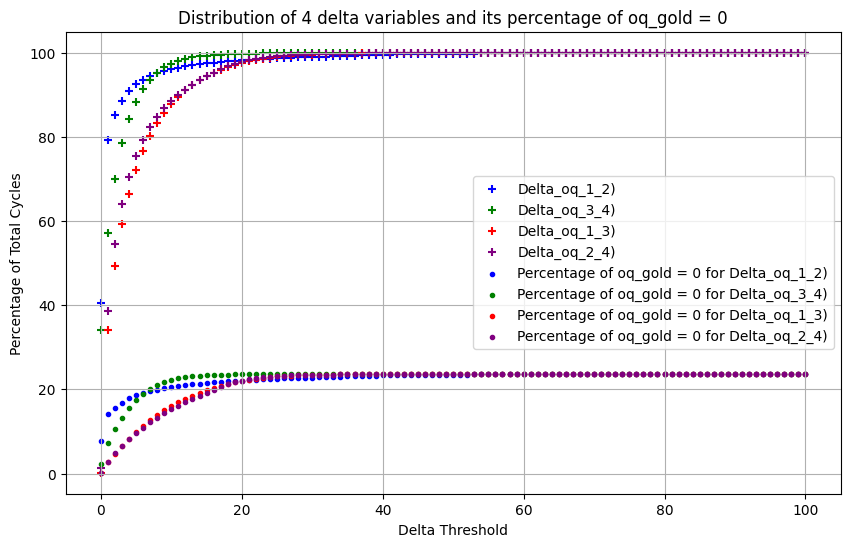

In [47]:
# Plot the distribution
plt.figure(figsize=(10, 6))
plt.scatter(thresholds, delta_1_2_percentages, label='Delta_oq_1_2)', marker='+', color='blue')
plt.scatter(thresholds, delta_3_4_percentages, label='Delta_oq_3_4)', marker='+', color='green')
plt.scatter(thresholds, delta_1_3_percentages, label='Delta_oq_1_3)', marker='+', color='red')
plt.scatter(thresholds, delta_2_4_percentages, label='Delta_oq_2_4)', marker='+', color='purple')
plt.scatter(thresholds, oq_gold_exc_1_2_percentages, label='Percentage of oq_gold = 0 for Delta_oq_1_2)', marker='.', color='blue')
plt.scatter(thresholds, oq_gold_exc_3_4_percentages, label='Percentage of oq_gold = 0 for Delta_oq_3_4)', marker='.', color='green')
plt.scatter(thresholds, oq_gold_exc_1_3_percentages, label='Percentage of oq_gold = 0 for Delta_oq_1_3)', marker='.', color='red')
plt.scatter(thresholds, oq_gold_exc_2_4_percentages, label='Percentage of oq_gold = 0 for Delta_oq_2_4)', marker='.', color='purple')
plt.xlabel('Delta Threshold')
plt.ylabel('Percentage of Total Cycles')
plt.title('Distribution of 4 delta variables and its percentage of oq_gold = 0')
plt.legend()
plt.grid(True)
plt.show()

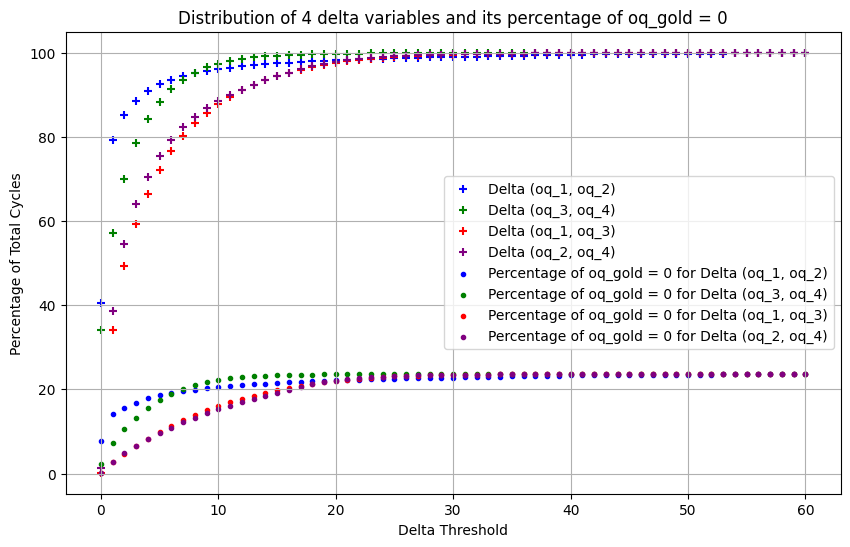

In [50]:
# Calculate the deltas
df['delta_1_2'] = abs(df['oq_1'] - df['oq_2'])  # absolute value of the difference between oq_1 (maxima on unsmoothed signal) and oq_2 (maxima on smoothed signal)
df['delta_3_4'] = abs(df['oq_3'] - df['oq_4'])  # absolute value of the difference between oq_3 (barycentre of peaks on unsmoothed signal) and oq_4 (barycentre of peaks on smoothed signal)
df['delta_1_3'] = abs(df['oq_1'] - df['oq_3'])  # absolute value of the difference between oq_1 (maxima on unsmoothed signal) and oq_3 (barycentre of peaks on unsmoothed signal)
df['delta_2_4'] = abs(df['oq_2'] - df['oq_4'])  # absolute value of the difference between oq_2 (maxima on smoothed signal) and oq_4 (barycentre of peaks on smoothed signal)

# Initialize lists to store the counts
delta_1_2_counts = []
delta_3_4_counts = []
delta_1_3_counts = []
delta_2_4_counts = []
oq_gold_exc_1_2_counts = []
oq_gold_exc_3_4_counts = []
oq_gold_exc_1_3_counts = []
oq_gold_exc_2_4_counts = []

# Calculate the counts for each threshold from 0 to 60
thresholds = range(0, 61)
for threshold in thresholds:
    delta_1_2_mask = df['delta_1_2'] <= threshold
    delta_3_4_mask = df['delta_3_4'] <= threshold
    delta_1_3_mask = df['delta_1_3'] <= threshold
    delta_2_4_mask = df['delta_2_4'] <= threshold
    
    delta_1_2_counts.append(delta_1_2_mask.sum())
    delta_3_4_counts.append(delta_3_4_mask.sum())
    delta_1_3_counts.append(delta_1_3_mask.sum())
    delta_2_4_counts.append(delta_2_4_mask.sum())
    
    oq_gold_exc_1_2_counts.append((df['oq_gold'][delta_1_2_mask] == 0).sum())
    oq_gold_exc_3_4_counts.append((df['oq_gold'][delta_3_4_mask] == 0).sum())
    oq_gold_exc_1_3_counts.append((df['oq_gold'][delta_1_3_mask] == 0).sum())
    oq_gold_exc_2_4_counts.append((df['oq_gold'][delta_2_4_mask] == 0).sum())

# Calculate the total number of cycles
total_cycles = len(df)

# Calculate the percentages
delta_1_2_percentages = [(count / total_cycles) * 100 for count in delta_1_2_counts]
delta_3_4_percentages = [(count / total_cycles) * 100 for count in delta_3_4_counts]
delta_1_3_percentages = [(count / total_cycles) * 100 for count in delta_1_3_counts]
delta_2_4_percentages = [(count / total_cycles) * 100 for count in delta_2_4_counts]
oq_gold_exc_1_2_percentages = [(count / total_cycles) * 100 for count in oq_gold_exc_1_2_counts]
oq_gold_exc_3_4_percentages = [(count / total_cycles) * 100 for count in oq_gold_exc_3_4_counts]
oq_gold_exc_1_3_percentages = [(count / total_cycles) * 100 for count in oq_gold_exc_1_3_counts]
oq_gold_exc_2_4_percentages = [(count / total_cycles) * 100 for count in oq_gold_exc_2_4_counts]

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.scatter(thresholds, delta_1_2_percentages, label='Delta (oq_1, oq_2)', marker='+', color='blue')
plt.scatter(thresholds, delta_3_4_percentages, label='Delta (oq_3, oq_4)', marker='+', color='green')
plt.scatter(thresholds, delta_1_3_percentages, label='Delta (oq_1, oq_3)', marker='+', color='red')
plt.scatter(thresholds, delta_2_4_percentages, label='Delta (oq_2, oq_4)', marker='+', color='purple')
plt.scatter(thresholds, oq_gold_exc_1_2_percentages, label='Percentage of oq_gold = 0 for Delta (oq_1, oq_2)', marker='.', color='blue')
plt.scatter(thresholds, oq_gold_exc_3_4_percentages, label='Percentage of oq_gold = 0 for Delta (oq_3, oq_4)', marker='.', color='green')
plt.scatter(thresholds, oq_gold_exc_1_3_percentages, label='Percentage of oq_gold = 0 for Delta (oq_1, oq_3)', marker='.', color='red')
plt.scatter(thresholds, oq_gold_exc_2_4_percentages, label='Percentage of oq_gold = 0 for Delta (oq_2, oq_4)', marker='.', color='purple')
plt.xlabel('Delta Threshold')
plt.ylabel('Percentage of Total Cycles')
plt.title('Distribution of 4 delta variables and its percentage of oq_gold = 0')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
df

,spe_id,uid,syl_begin,syl_end,cyc_begin,cyc_end,f0,oq_1,oq_2,oq_3,oq_4,oq_gold,creak,delta_1_2,delta_3_4,delta_1_3,delta_2_4
0,F7,101,13.623,14.124,0.055151,0.059073,254.942716,50.289017,50.289017,60.047703,64.092905,0.000000,0,0.000000,4.045202,9.758686,13.803888
1,F7,101,13.623,14.124,0.059073,0.063230,240.591722,75.409836,73.770492,65.988645,69.750847,73.770492,0,1.639344,3.762202,9.421191,4.019645
2,F7,101,13.623,14.124,0.063230,0.067413,239.026069,75.675676,75.675676,68.117290,75.534476,75.675676,0,0.000000,7.417185,7.558385,0.141200
3,F7,101,13.623,14.124,0.067413,0.071655,235.735358,75.935829,77.005348,70.569769,70.569769,0.000000,0,1.069519,0.000000,5.366060,6.435578
4,F7,101,13.623,14.124,0.071655,0.075870,237.280712,72.580645,73.655914,62.104951,70.947247,0.000000,0,1.075269,8.842296,10.475695,2.708667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415140,F17,6642,1675.869,1676.233,0.266568,0.270473,256.077593,65.425532,65.425532,64.893617,64.893617,65.425532,0,0.000000,0.000000,0.531915,0.531915
415141,F17,6642,1675.869,1676.233,0.270473,0.274275,263.051138,69.780220,69.780220,69.230769,69.230769,69.780220,0,0.000000,0.000000,0.549451,0.549451
415142,F17,6642,1675.869,1676.233,0.274275,0.277936,273.150215,78.409091,78.409091,78.042786,77.647268,78.409091,0,0.000000,0.395518,0.366305,0.761823
415143,F17,6642,1675.869,1676.233,0.277936,0.281497,280.819519,76.608187,79.532164,78.250343,78.250343,79.532164,0,2.923977,0.000000,1.642156,1.281821
